In [ ]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("fedesoriano/stroke-prediction-dataset")

print("Path to dataset files:", path)

Using Colab cache for faster access to the 'stroke-prediction-dataset' dataset.
Path to dataset files: /kaggle/input/stroke-prediction-dataset


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv(path + "/healthcare-dataset-stroke-data.csv")
df.head()
print(len(df['id']))

5110


In [ ]:
for col in df.columns:
    print(col, df[col].unique())
    df[col].dropna()
df_final = pd.get_dummies(df,columns=['gender','ever_married','work_type','Residence_type','smoking_status'])
df_final.head()

id [ 9046 51676 31112 ... 19723 37544 44679]
gender ['Male' 'Female' 'Other']
age [6.70e+01 6.10e+01 8.00e+01 4.90e+01 7.90e+01 8.10e+01 7.40e+01 6.90e+01
 5.90e+01 7.80e+01 5.40e+01 5.00e+01 6.40e+01 7.50e+01 6.00e+01 5.70e+01
 7.10e+01 5.20e+01 8.20e+01 6.50e+01 5.80e+01 4.20e+01 4.80e+01 7.20e+01
 6.30e+01 7.60e+01 3.90e+01 7.70e+01 7.30e+01 5.60e+01 4.50e+01 7.00e+01
 6.60e+01 5.10e+01 4.30e+01 6.80e+01 4.70e+01 5.30e+01 3.80e+01 5.50e+01
 1.32e+00 4.60e+01 3.20e+01 1.40e+01 3.00e+00 8.00e+00 3.70e+01 4.00e+01
 3.50e+01 2.00e+01 4.40e+01 2.50e+01 2.70e+01 2.30e+01 1.70e+01 1.30e+01
 4.00e+00 1.60e+01 2.20e+01 3.00e+01 2.90e+01 1.10e+01 2.10e+01 1.80e+01
 3.30e+01 2.40e+01 3.40e+01 3.60e+01 6.40e-01 4.10e+01 8.80e-01 5.00e+00
 2.60e+01 3.10e+01 7.00e+00 1.20e+01 6.20e+01 2.00e+00 9.00e+00 1.50e+01
 2.80e+01 1.00e+01 1.80e+00 3.20e-01 1.08e+00 1.90e+01 6.00e+00 1.16e+00
 1.00e+00 1.40e+00 1.72e+00 2.40e-01 1.64e+00 1.56e+00 7.20e-01 1.88e+00
 1.24e+00 8.00e-01 4.00e-01 8.00e-02 1.48e

,id,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke,gender_Female,gender_Male,gender_Other,...,work_type_Never_worked,work_type_Private,work_type_Self-employed,work_type_children,Residence_type_Rural,Residence_type_Urban,smoking_status_Unknown,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes
0,9046,67.0,0,1,228.69,36.6,1,False,True,False,...,False,True,False,False,False,True,False,True,False,False
1,51676,61.0,0,0,202.21,NaN,1,True,False,False,...,False,False,True,False,True,False,False,False,True,False
2,31112,80.0,0,1,105.92,32.5,1,False,True,False,...,False,True,False,False,True,False,False,False,True,False
3,60182,49.0,0,0,171.23,34.4,1,True,False,False,...,False,True,False,False,False,True,False,False,False,True
4,1665,79.0,1,0,174.12,24.0,1,True,False,False,...,False,False,True,False,True,False,False,False,True,False


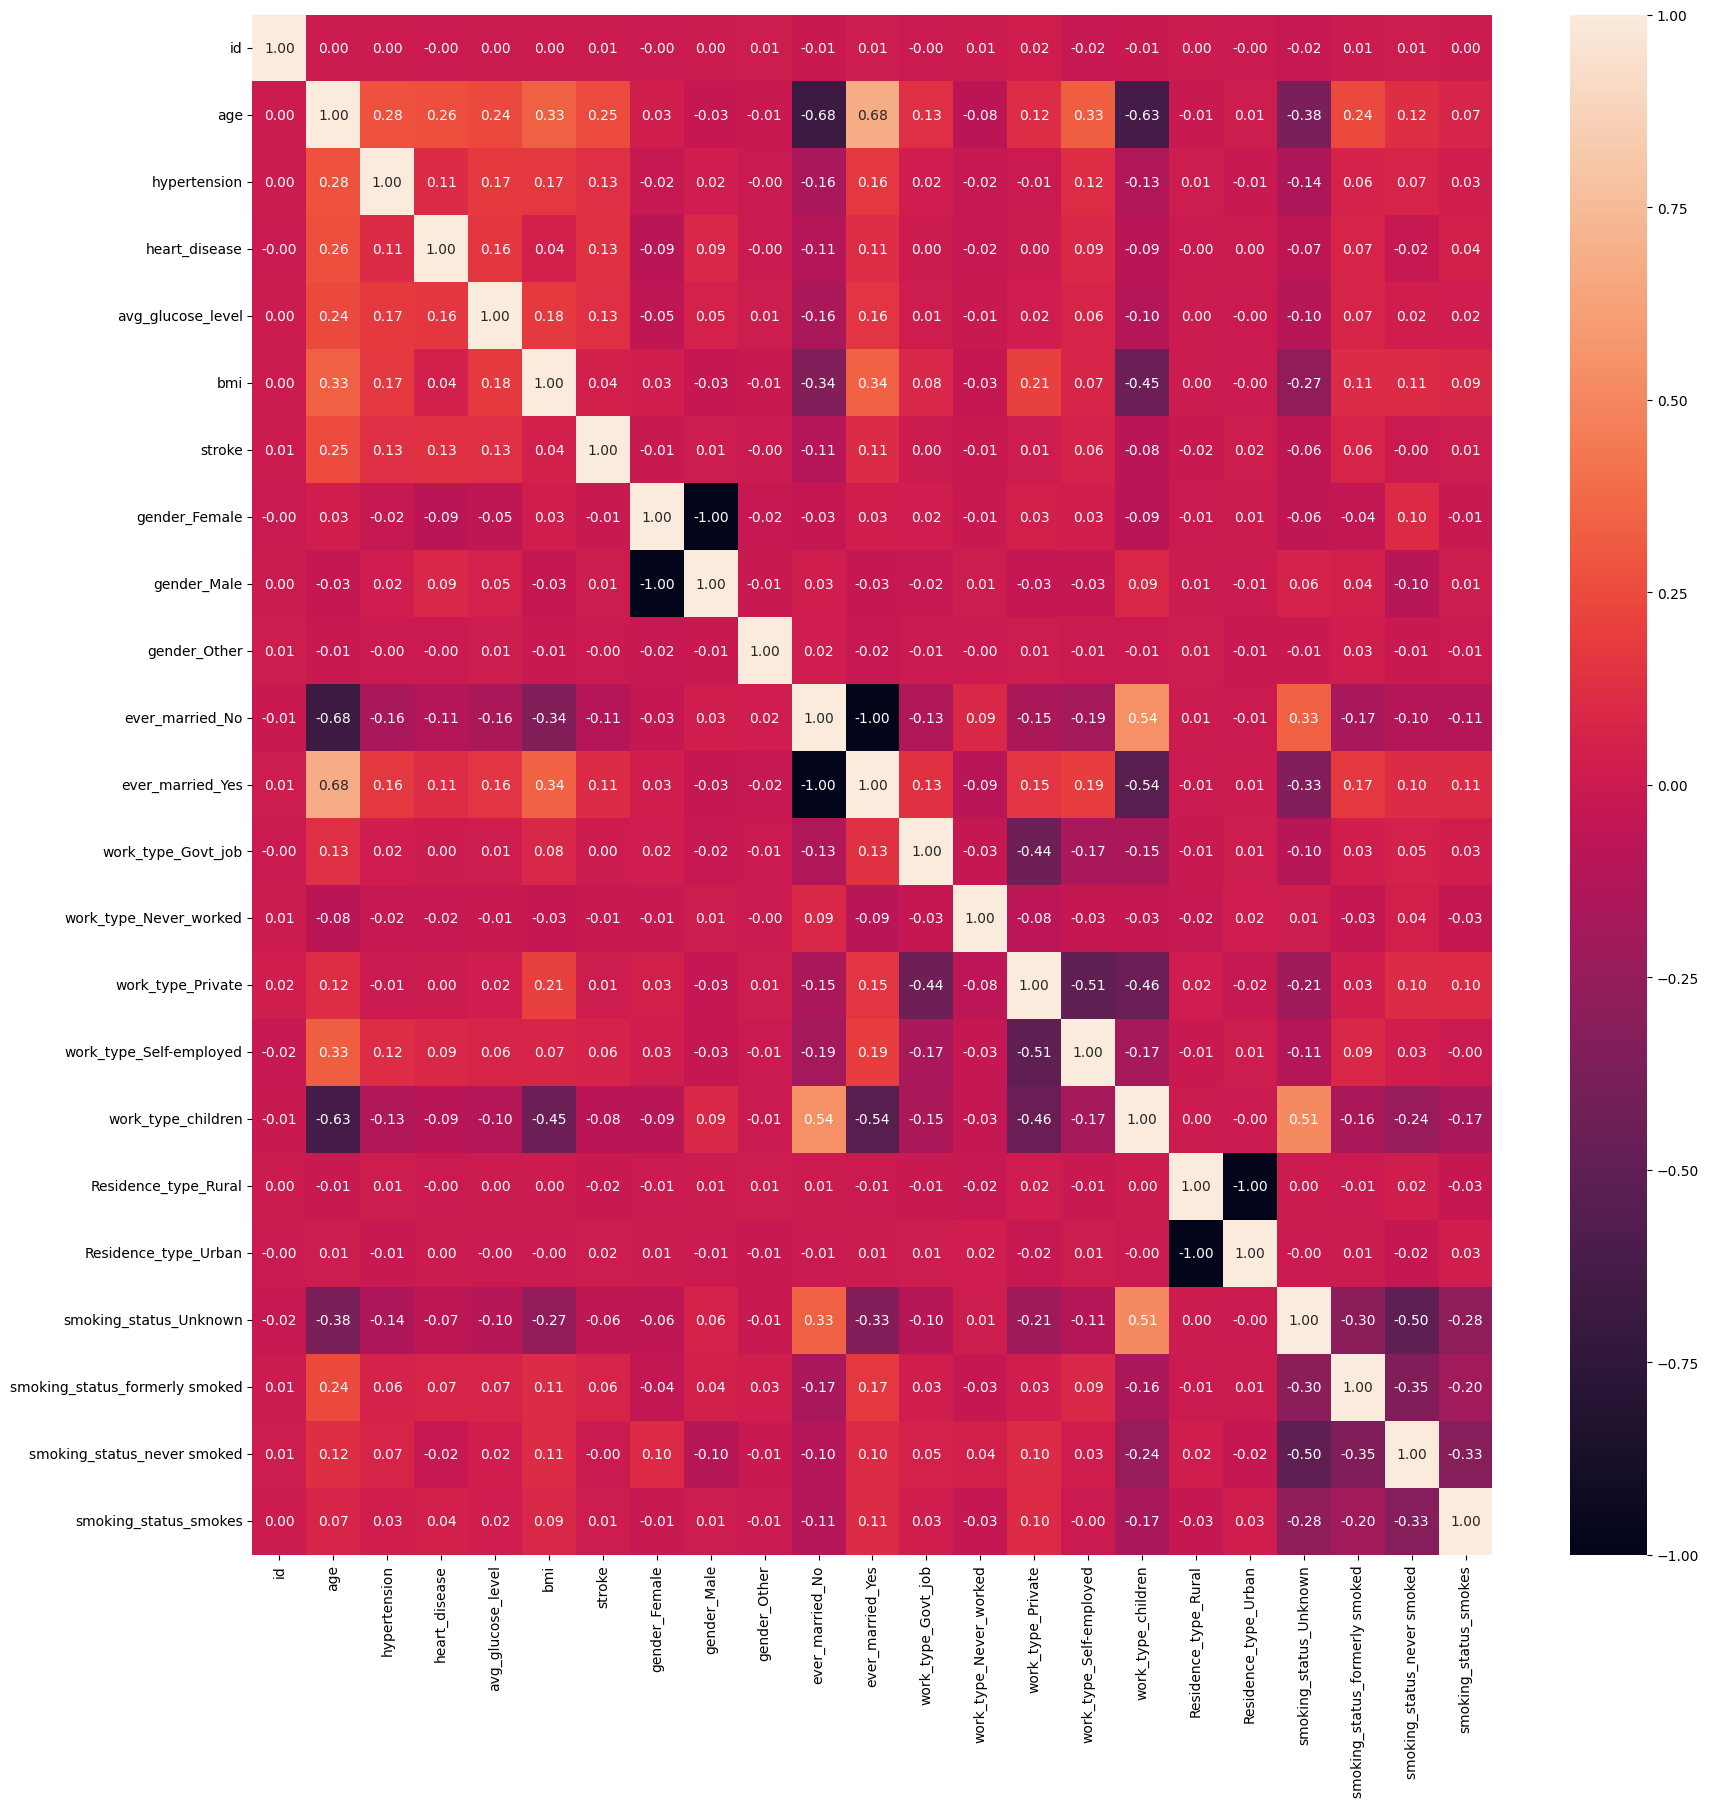

In [ ]:
def heatmap(df):
  plt.figure(figsize=(20,20))
  sns.heatmap(df.corr(),fmt = ".2f", vmin= -1, vmax = 1, annot=True)
  plt.show()
heatmap(df_final)

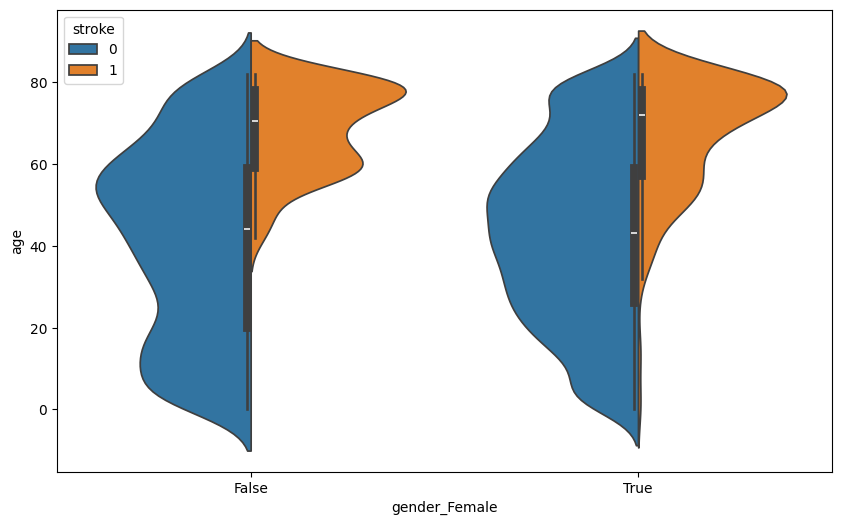

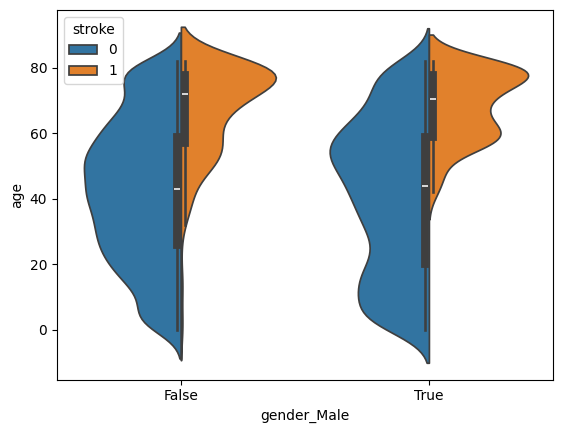

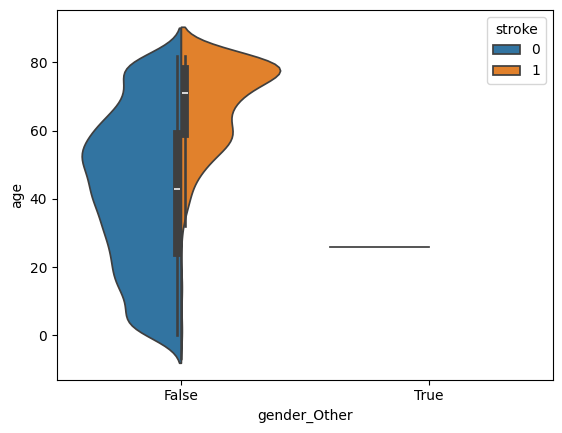

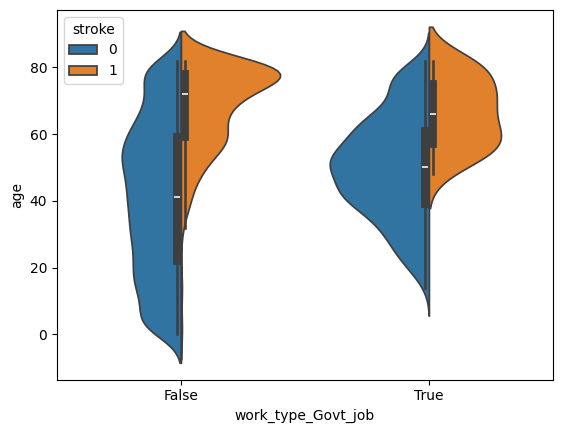

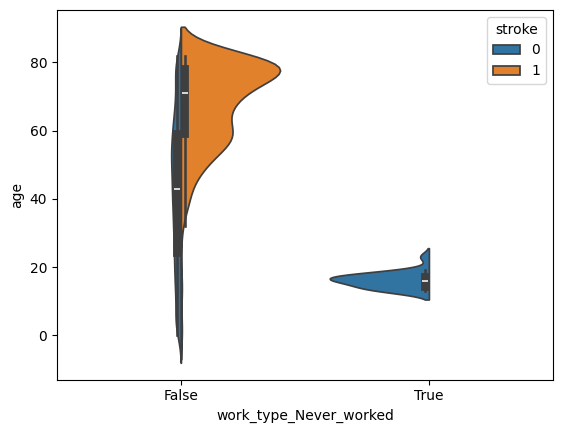

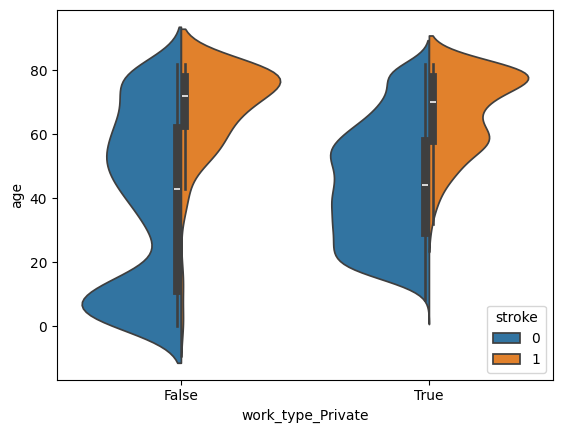

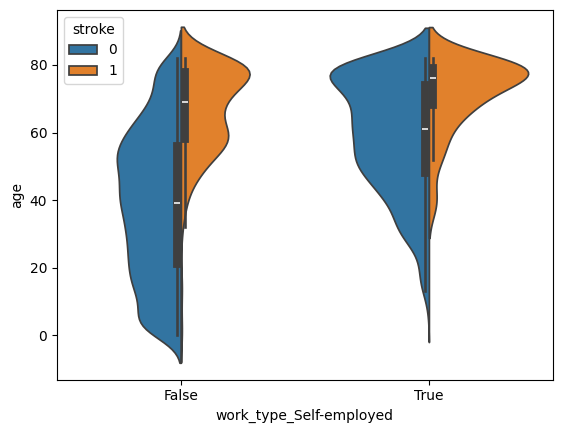

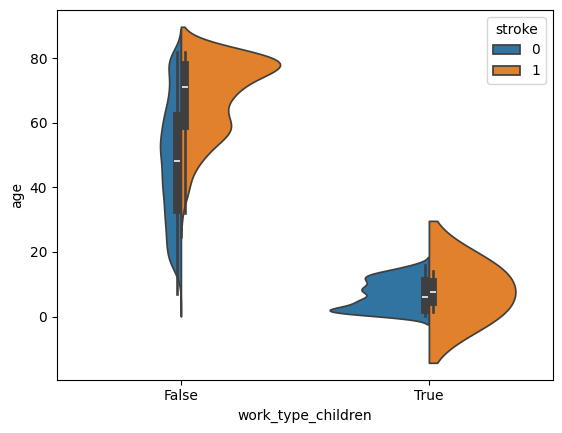

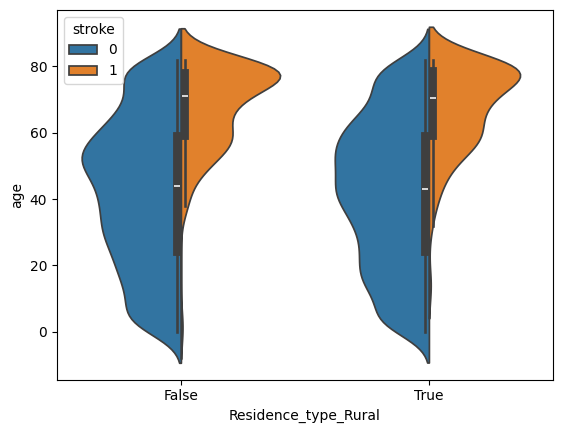

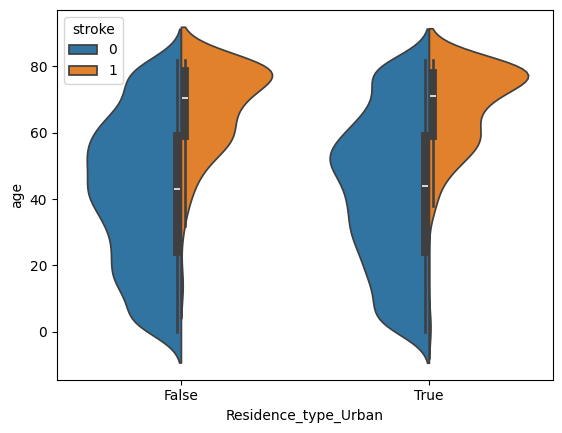

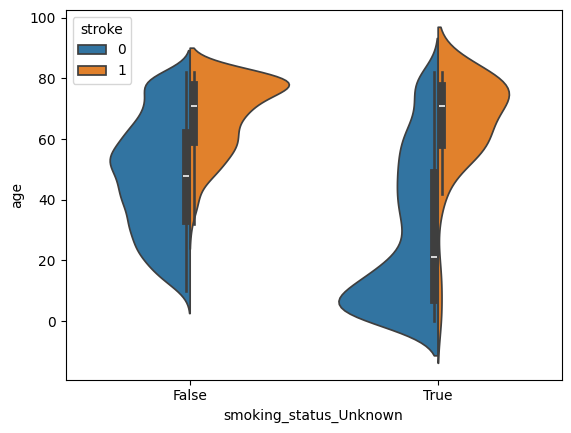

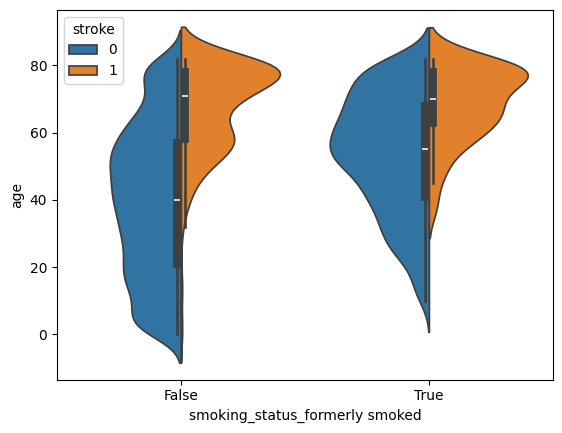

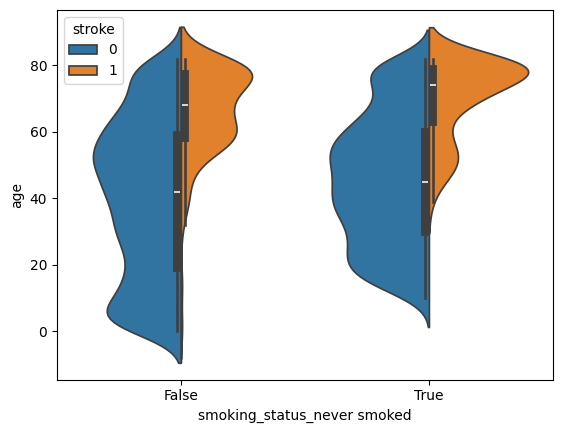

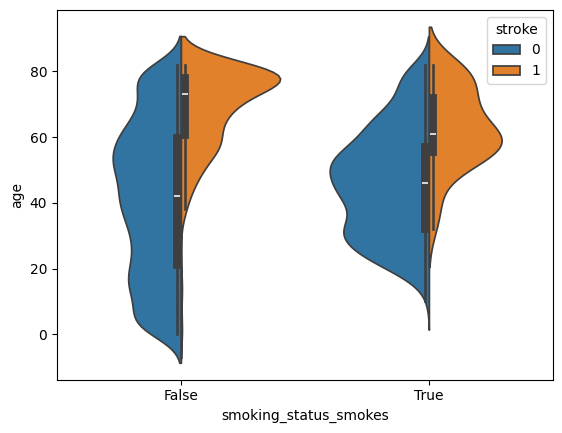

In [ ]:

plt.figure(figsize=(10, 6))
ms = ['gender_Female', 'gender_Male', 'gender_Other','work_type_Govt_job','work_type_Never_worked','work_type_Private','work_type_Self-employed','work_type_children','Residence_type_Rural','Residence_type_Urban','smoking_status_Unknown','smoking_status_formerly smoked','smoking_status_never smoked','smoking_status_smokes']
for m in ms:
  sns.violinplot(x=m,y='age',hue='stroke',data=df_final,split=True)
  plt.show()

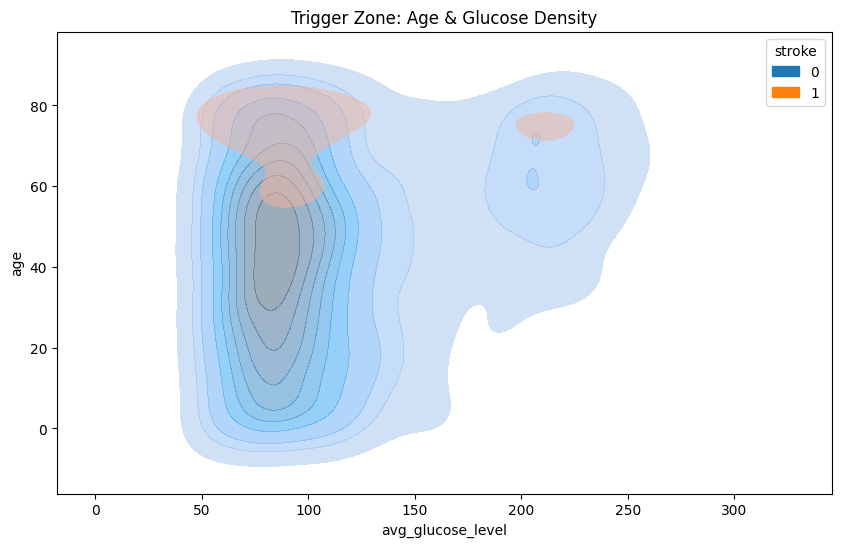

In [ ]:
plt.figure(figsize=(10, 6))
sns.kdeplot(data=df_final, x='avg_glucose_level', y='age', hue='stroke', fill=True, alpha=0.5)
plt.title('Trigger Zone: Age & Glucose Density')
plt.show()

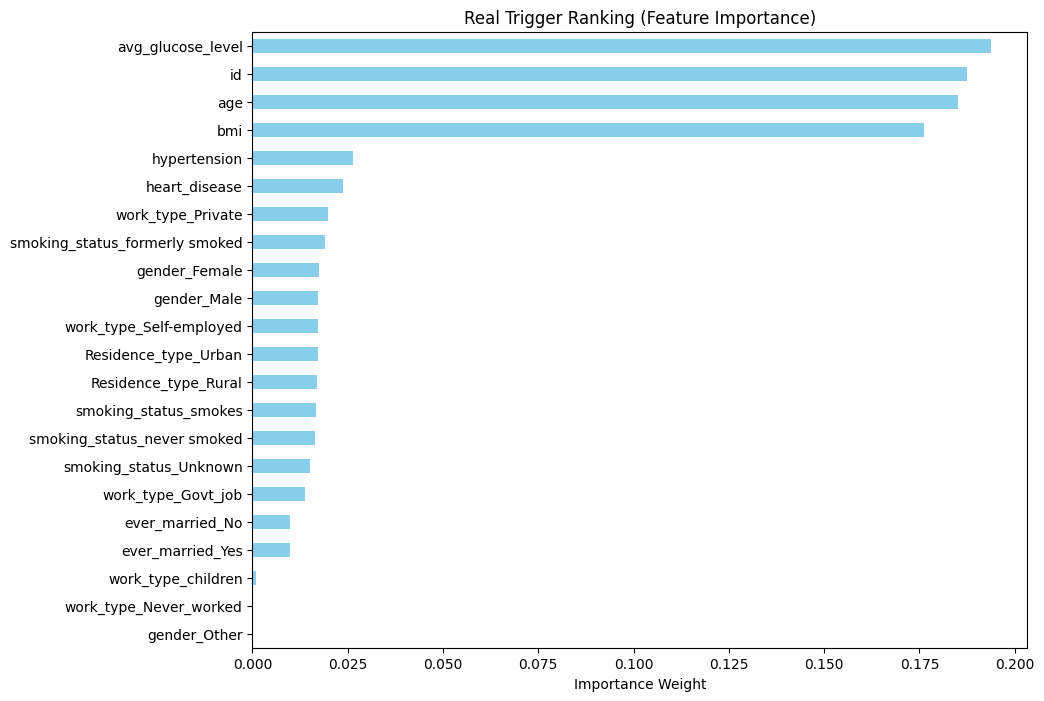

In [ ]:
#df_final.drop(columns=['id','Residence_type_Urban','Residence_type_Rural'], axis=1, inplace=True)
#df_test = df_final.drop(columns=['stroke'], axis=1)
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split



X = df_final.drop('stroke', axis=1)
y = df_final['stroke']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# 4. training model (Random Forest)
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

# 5. visualize important trigger
importances = pd.Series(rf.feature_importances_, index=X.columns)
importances = importances.sort_values(ascending=True)

plt.figure(figsize=(10, 8))
importances.plot(kind='barh', color='skyblue')
plt.title('Real Trigger Ranking (Feature Importance)')
plt.xlabel('Importance Weight')
plt.show()

학습에 사용된 환자 수: 104명
테스트에 사용된 환자 수: 105명

[처음 보는 나머지 절반 데이터에 대한 검증 결과]
              precision    recall  f1-score   support

           0       0.81      0.84      0.82       210
           1       0.65      0.61      0.63       105

    accuracy                           0.76       315
   macro avg       0.73      0.72      0.73       315
weighted avg       0.76      0.76      0.76       315



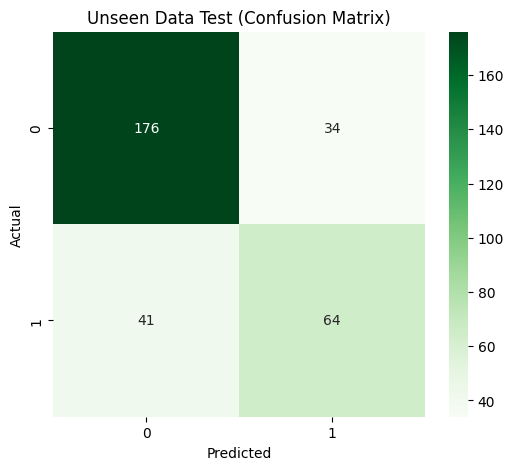

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# 1. delete id
df_final.dropna(inplace=True)
if 'id' in df_final.columns:
    df_final.drop(columns=['id'], inplace=True)

# 2. divide stroke patient and non patient
stroke_1 = df_final[df_final['stroke'] == 1]
stroke_0 = df_final[df_final['stroke'] == 0]

# 50% of stroke patient extract randomly
n_stroke_1_half = int(len(stroke_1) * 0.5)
stroke_1_train = stroke_1.sample(n=n_stroke_1_half, random_state=42)

# extracting non-stroke patient (2 times of amount of the stroke patient)
stroke_0_train = stroke_0.sample(n=n_stroke_1_half * 2, random_state=42)

# 3. merge training set (Train Set)
df_train = pd.concat([stroke_1_train, stroke_0_train])
X_train = df_train.drop('stroke', axis=1)
y_train = df_train['stroke']

# 4. model training(Random Forest)
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

# ---------------------------------------------------------
# [핵심] 5. non-training set
# ---------------------------------------------------------
# extracting non-training set from the original dataset
remaining_stroke_1 = stroke_1.drop(stroke_1_train.index)
remaining_stroke_0 = stroke_0.drop(stroke_0_train.index)

# test dataset (1:2 ratio)
stroke_0_test = remaining_stroke_0.sample(n=len(remaining_stroke_1) * 2, random_state=42)

df_test_unseen = pd.concat([remaining_stroke_1, stroke_0_test])
X_unseen = df_test_unseen.drop('stroke', axis=1)
y_unseen = df_unseen_test = df_test_unseen['stroke']

# 6. test with test-set
y_pred_unseen = rf.predict(X_unseen)

# 7. evaluation
print(f"the number of patient in training: {len(stroke_1_train)}명")
print(f"the number of patient in test: {len(remaining_stroke_1)}명")
print("\n[result]")
print(classification_report(y_unseen, y_pred_unseen))

# 8. visualize the difference
plt.figure(figsize=(6,5))
sns.heatmap(confusion_matrix(y_unseen, y_pred_unseen), annot=True, fmt='d', cmap='Greens')
plt.title('Unseen Data Test (Confusion Matrix)')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

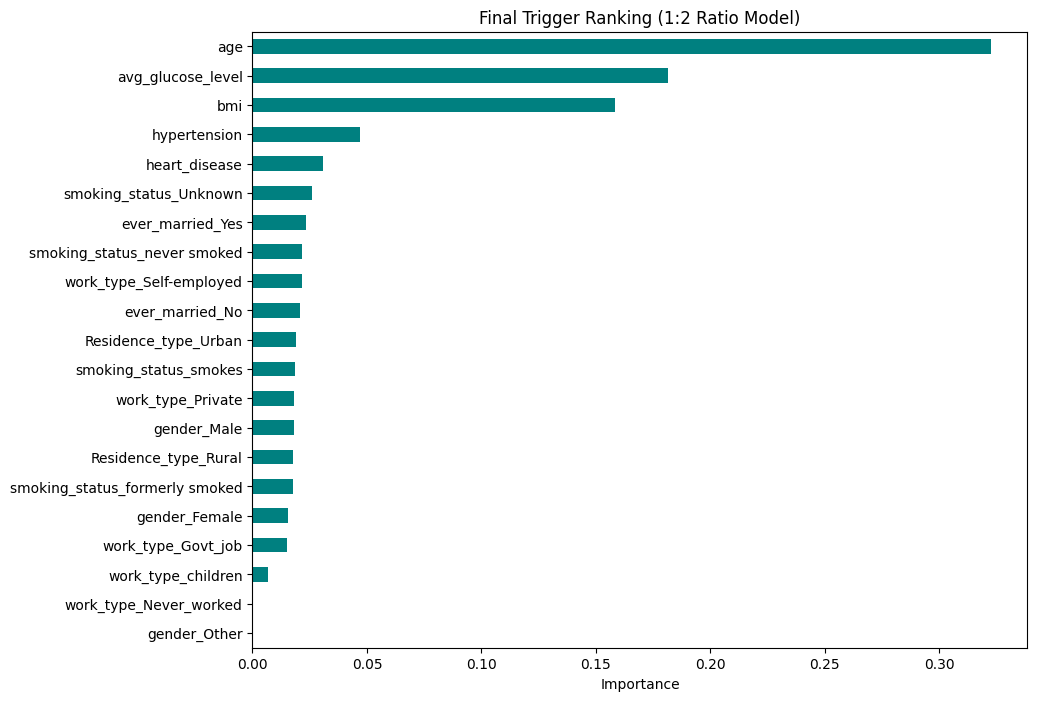

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# 트리거 중요도 추출
importances = pd.Series(rf.feature_importances_, index=X.columns).sort_values(ascending=True)

# 시각화
plt.figure(figsize=(10, 8))
importances.plot(kind='barh', color='teal')
plt.title('Final Trigger Ranking (1:2 Ratio Model)')
plt.xlabel('Importance')
plt.show()